In [1]:
# Step 1: Install Necessary Libraries
!pip install transformers torch torchvision

In [2]:
# Step 2: Import Libraries
import os
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from transformers import ViTForImageClassification, ViTConfig
from PIL import Image

In [59]:
# Step 3: Define Dataset Class
class RealVFakeDataset(Dataset):
    def __init__(self, directory, transform=None):
        self.directory = directory
        self.transform = transform
        self.images = []
        self.labels = []
        for label, subdir in enumerate(['real', 'fake']):
            subdir_path = os.path.join(directory, subdir)
            for img_file in os.listdir(subdir_path):
                if(img_file == "00000.jpg"):
                  print(img_file , label)
                self.images.append(os.path.join(subdir_path, img_file))
                self.labels.append(label)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        image = Image.open(img_path)
        if self.transform:
            image = self.transform(image)
        label = self.labels[idx]
        return image, label

In [23]:
# Step 4: Load Dataset and DataLoader
transform = transforms.Compose([
    # transforms.RandomHorizontalFlip(),
    # transforms.RandomRotation(10),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

])

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!unzip '/content/drive/MyDrive/ML Project - Dump/archive.zip'

Streaming output truncated to the last 5000 lines.
  inflating: real_vs_fake/real-vs-fake/valid/real/34832.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34836.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34839.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34847.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34848.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34852.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34861.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34864.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34868.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34877.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34883.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34887.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34891.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34894.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34904.jpg  
  inflating: real_v

In [60]:
train_dataset = RealVFakeDataset('/content/real_vs_fake/real-vs-fake/train', transform)
valid_dataset = RealVFakeDataset('/content/real_vs_fake/real-vs-fake/valid', transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32)

00000.jpg 0


In [8]:
!pip install transformers datasets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.7 MB/s eta 0:00:00


In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [ ]:
from datasets import load_dataset


dataset = load_dataset('imagefolder', data_files={'train': '/content/real_vs_fake/real-vs-fake/train/*/*',
                                                  'test': '/content/real_vs_fake/real-vs-fake/test/*/*',
                                                  'validation': '/content/real_vs_fake/real-vs-fake/val/*/*'})

In [26]:
# Step 5: Initialize Vision Transformer Model
from transformers import LevitForImageClassification, LevitConfig
import torch

# Load pre-trained model configuration
config = LevitConfig.from_pretrained("facebook/levit-128S")
config.num_labels = 2  # Update number of classes

# Load pre-trained model with updated configuration
model = LevitForImageClassification.from_pretrained("facebook/levit-128S", config=config, ignore_mismatched_sizes=True)
model.to(device)

Some weights of LevitForImageClassification were not initialized from the model checkpoint at facebook/levit-128S and are newly initialized because the shapes did not match:
- classifier.linear.weight: found shape torch.Size([1000, 384]) in the checkpoint and torch.Size([2, 384]) in the model instantiated
- classifier.linear.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


LevitForImageClassification(
  (levit): LevitModel(
    (patch_embeddings): LevitPatchEmbeddings(
      (embedding_layer_1): LevitConvEmbeddings(
        (convolution): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (batch_norm): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (activation_layer_1): Hardswish()
      (embedding_layer_2): LevitConvEmbeddings(
        (convolution): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (batch_norm): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (activation_layer_2): Hardswish()
      (embedding_layer_3): LevitConvEmbeddings(
        (convolution): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (batch_norm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (activation_layer_3): Hardswish()
      

In [27]:
# Step 6: Define Loss Function and Optimizer
from torch.optim.lr_scheduler import StepLR

loss_function  = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
scheduler = StepLR(optimizer, step_size=5, gamma=0.1)


In [28]:
import time
def calculate_accuracy(outputs, labels):
    # Get the predictions from the outputs
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == labels).sum().item()
    total = labels.size(0)
    accuracy = 100 * correct / total
    return accuracy
# Step 7: Training Loop
num_epochs = 15  # Adjust as necessary
training_losses = []
validation_losses = []
training_accuracies = []
validation_accuracies = []

early_stopping_patience = 5
min_val_loss = float('inf')
epochs_no_improve = 0

for epoch in range(num_epochs):
    model.train()
    start_time = time.time()
    total_loss, total_accuracy = 0, 0

    for step, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images).logits
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        total_accuracy += calculate_accuracy(outputs, labels)

        # Calculate and print ETA
        elapsed_time = time.time() - start_time
        steps_per_epoch = len(train_loader)
        remaining_steps = steps_per_epoch - (step + 1)
        eta = (elapsed_time / (step + 1)) * remaining_steps

        if step % 100 == 0:  # Print progress every 10 steps
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{step+1}/{steps_per_epoch}], Loss: {loss.item():.4f}, ETA: {eta:.2f} sec")

    average_loss = total_loss / len(train_loader)
    average_accuracy = total_accuracy / len(train_loader)
    training_losses.append(average_loss)
    training_accuracies.append(average_accuracy)
    print(f"Epoch [{epoch+1}/{num_epochs}] Training Loss: {average_loss:.4f} Accuracy: {average_accuracy:.2f}%")

    # Validation Step
    model.eval()
    valid_loss, valid_accuracy = 0, 0
    with torch.no_grad():
        for images, labels in valid_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images).logits
            loss = loss_function(outputs, labels)
            valid_loss += loss.item()
            valid_accuracy += calculate_accuracy(outputs, labels)
    average_valid_loss = valid_loss / len(valid_loader)
    average_valid_accuracy = valid_accuracy / len(valid_loader)
    validation_losses.append(average_valid_loss)
    validation_accuracies.append(average_valid_accuracy)
    print(f"Epoch [{epoch+1}/{num_epochs}] Validation Loss: {average_valid_loss:.4f} Accuracy: {average_valid_accuracy:.2f}%")

    if average_valid_loss < min_val_loss:
        min_val_loss = average_valid_loss
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1

    if epochs_no_improve >= early_stopping_patience:
        print(f'Early stopping triggered after epoch {epoch+1}')
        break
    scheduler.step()

# Save the model
torch.save(model.state_dict(), "fine_tuned_levit_model.pth")


Epoch [1/15], Step [1/3125], Loss: 0.7445, ETA: 438.18 sec
Epoch [1/15], Step [101/3125], Loss: 0.5928, ETA: 388.39 sec
Epoch [1/15], Step [201/3125], Loss: 0.4371, ETA: 371.48 sec
Epoch [1/15], Step [301/3125], Loss: 0.5213, ETA: 358.09 sec
Epoch [1/15], Step [401/3125], Loss: 0.6069, ETA: 343.51 sec
Epoch [1/15], Step [501/3125], Loss: 0.2679, ETA: 329.39 sec
Epoch [1/15], Step [601/3125], Loss: 0.3021, ETA: 316.16 sec
Epoch [1/15], Step [701/3125], Loss: 0.2864, ETA: 302.77 sec
Epoch [1/15], Step [801/3125], Loss: 0.4256, ETA: 290.04 sec
Epoch [1/15], Step [901/3125], Loss: 0.1712, ETA: 277.97 sec
Epoch [1/15], Step [1001/3125], Loss: 0.1455, ETA: 265.87 sec
Epoch [1/15], Step [1101/3125], Loss: 0.2209, ETA: 253.30 sec
Epoch [1/15], Step [1201/3125], Loss: 0.2493, ETA: 241.07 sec
Epoch [1/15], Step [1301/3125], Loss: 0.1155, ETA: 228.97 sec
Epoch [1/15], Step [1401/3125], Loss: 0.1395, ETA: 217.03 sec
Epoch [1/15], Step [1501/3125], Loss: 0.3303, ETA: 204.93 sec
Epoch [1/15], Step [

In [29]:
print("TRAINING ACCURACIES",training_accuracies)

print("VALIDATION ACCURACIES",validation_accuracies)


TRAINING ACCURACIES [89.275, 96.222, 98.219, 99.09, 99.135, 99.755, 99.911, 99.972, 99.971, 99.979, 99.987, 99.989, 99.991, 99.995, 99.996]
VALIDATION ACCURACIES [95.68, 97.39, 98.265, 98.425, 98.365, 99.385, 99.545, 99.625, 99.59, 99.585, 99.66, 99.61, 99.66, 99.665, 99.635]


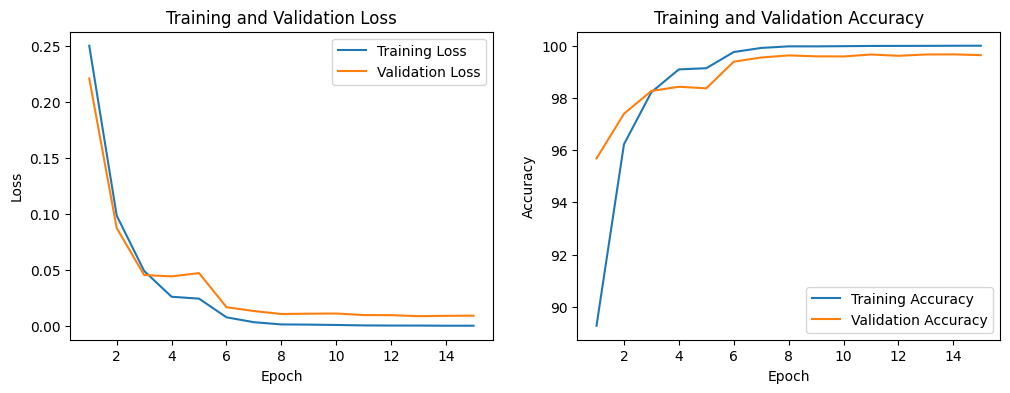

In [30]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), training_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), training_accuracies, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), validation_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()


In [31]:
# Continuation from the previous code

# Step 8: Define a Function to Calculate Accuracy
def calculate_accuracy(model, data_loader, device):
    correct_pred = 0
    total_pred = 0

    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images).logits
            _, predicted = torch.max(outputs, 1)
            correct_pred += (predicted == labels).sum().item()
            total_pred += labels.size(0)

    return correct_pred / total_pred

# Step 9: Load Test Dataset and DataLoader
test_dataset = RealVFakeDataset('/content/real_vs_fake/real-vs-fake/test', transform)
test_loader = DataLoader(test_dataset, batch_size=32)

# Step 10: Evaluate the Model on Test Set
model.eval()
test_accuracy = calculate_accuracy(model, test_loader, device)
print(f"Test Accuracy: {test_accuracy * 100}%")

# Optional: Get Predictions for Individual Test Images
predictions = []
with torch.no_grad():
    for images, _ in test_loader:
        images = images.to(device)
        outputs = model(images).logits
        _, predicted = torch.max(outputs, 1)
        predictions.extend(predicted.cpu().numpy())

# Print some predictions
print("Some predictions:", predictions[:10])


Test Accuracy: 99.6%
Some predictions: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [32]:
test_dataset = RealVFakeDataset('/content/real_vs_fake/real-vs-fake/test', transform)
test_loader = DataLoader(test_dataset, batch_size=32)  # Adjust batch size as needed


In [33]:
model.eval()
predictions = []
actual_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images).logits
        _, predicted = torch.max(outputs, 1)

        predictions.extend(predicted.cpu().numpy())
        actual_labels.extend(labels.cpu().numpy())

In [34]:
import numpy as np
# Print predictions and actual labels
print("Predictions:", predictions)
print("Actual labels:", actual_labels)

# Calculate accuracy
accuracy = sum(np.array(predictions) == np.array(actual_labels)) / len(actual_labels)
print(f"Accuracy: {accuracy * 100}%")

# Confusion Matrix (optional)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(actual_labels, predictions)
print("Confusion Matrix:\n", cm)


Predictions: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [35]:
from sklearn.metrics import confusion_matrix

# Assuming predictions and actual_labels are already defined
cm = confusion_matrix(actual_labels, predictions)


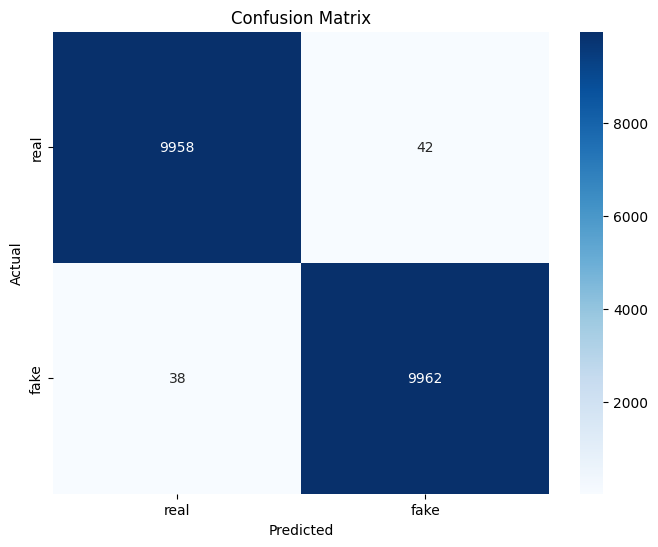

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
class_labels = ['real','fake']

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [57]:
from PIL import Image
from torchvision import transforms

# Transformations used during training, without augmentation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load and transform the image
img = Image.open("/content/real_vs_fake/real-vs-fake/train/fake/001DDU0NI4.jpg")
img = transform(img).unsqueeze(0)  # Add batch dimension
img = img.to(device)  # Move to the same device as your model
with torch.no_grad():
    outputs = model(img).logits
    _, predicted = torch.max(outputs, 1)
    predicted_class = predicted.item()

# Output the result
print(f"Predicted class: {predicted_class}")
# You can map this to a class name if you have a label map

Predicted class: 1


In [50]:
!unzip '/content/test.zip'

Archive:  /content/test.zip
  inflating: test/seed1454.png       
  inflating: test/seed1458.png       
  inflating: test/seed1461.png       
  inflating: test/seed1462.png       
  inflating: test/seed1463.png       
  inflating: test/seed1464.png       
  inflating: test/seed1465.png       
  inflating: test/seed1468.png       
  inflating: test/seed1471.png       
  inflating: test/seed1472.png       
  inflating: test/seed1477.png       
  inflating: test/seed1478.png       
  inflating: test/seed1480.png       
  inflating: test/seed1522.png       
  inflating: test/seed1523.png       
  inflating: test/seed1524.png       
  inflating: test/seed1527.png       
  inflating: test/seed1528.png       
  inflating: test/seed1529.png       
  inflating: test/seed1530.png       
  inflating: test/seed1531.png       
  inflating: test/seed1532.png       
  inflating: test/seed1533.png       
  inflating: test/seed1535.png       
  inflating: test/seed1536.png       
  inflating: test/seed

In [53]:
import os

directory = '/content/test'
image_paths = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith(('.png', '.jpg', '.jpeg'))]


In [63]:
for image_path in image_paths:
    # Load and transform the image
    img = Image.open(image_path)
    img = transform(img).unsqueeze(0)  # Add batch dimension
    img = img.to(device)  # Move to the same device as your model
    class_bale =['real', 'fake']
    # Model inference
    with torch.no_grad():
        outputs = model(img).logits
        _, predicted = torch.max(outputs, 1)
        predicted_class = predicted.item()

    # Output the result
    print(f"Image: {image_path}, Predicted class: {class_bale[predicted_class]}")
    # Optionally, map 'predicted_class' to a human-readable class name


Image: /content/test/seed1533.png, Predicted class: real
Image: /content/test/seed1536.png, Predicted class: real
Image: /content/test/seed1458.png, Predicted class: real
Image: /content/test/seed1478.png, Predicted class: real
Image: /content/test/seed1531.png, Predicted class: real
Image: /content/test/seed1524.png, Predicted class: real
Image: /content/test/seed1462.png, Predicted class: real
Image: /content/test/seed1537.png, Predicted class: real
Image: /content/test/seed1527.png, Predicted class: real
Image: /content/test/seed1472.png, Predicted class: real
Image: /content/test/seed1454.png, Predicted class: real
Image: /content/test/seed1532.png, Predicted class: real
Image: /content/test/seed1522.png, Predicted class: real
Image: /content/test/seed1480.png, Predicted class: real
Image: /content/test/seed1477.png, Predicted class: real
Image: /content/test/seed1530.png, Predicted class: real
Image: /content/test/seed1464.png, Predicted class: real
Image: /content/test/seed1535.p

In [ ]:
model